In [13]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [14]:
fontsize=36

In [15]:
def get_k_list(ens_size, d):

    if (d >= 3) or (ens_size == 10):
        k_list = [1, 2, 3, 4, 5, ens_size]
    else:
        k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    if k_list[-1] == ens_size:
        return k_list
    else:
        return k_list + list(range(10 + 5, ens_size//2 + 5, 5)) + [ens_size]

In [16]:
def get_PCP_metrics(output_saving_path):

    scores = np.load(output_saving_path / f'PCP_scores.npy')
    volumes = np.load(output_saving_path / f'PCP_volumes.npy')
    ks = np.load(output_saving_path / f'PCP_ks.npy')
    quant_score = np.load(output_saving_path / f'PCP_quant_score.npy')

    coverage = np.mean(scores < quant_score)
    vol = np.mean(volumes)
    k = np.mean(ks)

    return coverage, vol, k

In [17]:
def get_CP4Gen_metrics(output_saving_path, n_ens, d):

    str_list = output_saving_path.split('--')

    K_list = get_k_list(ens_size, d)

    Coverages = []
    Vols = []
    Ks = []

    for k in K_list:

        scores = np.load(output_saving_path / f'CP4Gen_scores_{k}.npy')
        volumes = np.load(output_saving_path / f'CP4Gen_volumes_{k}.npy')
        ks = np.load(output_saving_path / f'CP4Gen_ks_{k}.npy')
        quant_score = np.load(output_saving_path / f'CP4Gen_quant_score_{k}.npy')

        Coverages.append(np.mean(scores < quant_score))
        Vols.append(np.mean(volumes))
        Ks.append(np.mean(ks))

    idx = np.argmin(Vols)

    return Coverages[idx], Vols[idx], Ks[idx]

# 25-Gaussians

In [18]:
folder_path = Path('../../Data')

In [19]:
class Data:
    def __init__(self, epoch, dataset, show_name, ens_sizes):
        self.epoch = epoch
        self.dataset = dataset
        self.show_name = show_name
        self.ens_sizes = ens_sizes
        self.PCP_metrics = np.load(folder_path / f'ens_varied_PCP_metrics_{dataset}.npy')
        self.CP_metrics = np.load(folder_path / f'ens_varied_CP_metrics_{dataset}.npy')


In [20]:
data_25_gaussian = Data(50000, '25-Gaussians', '25-Gaussians', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [21]:
ms = 15

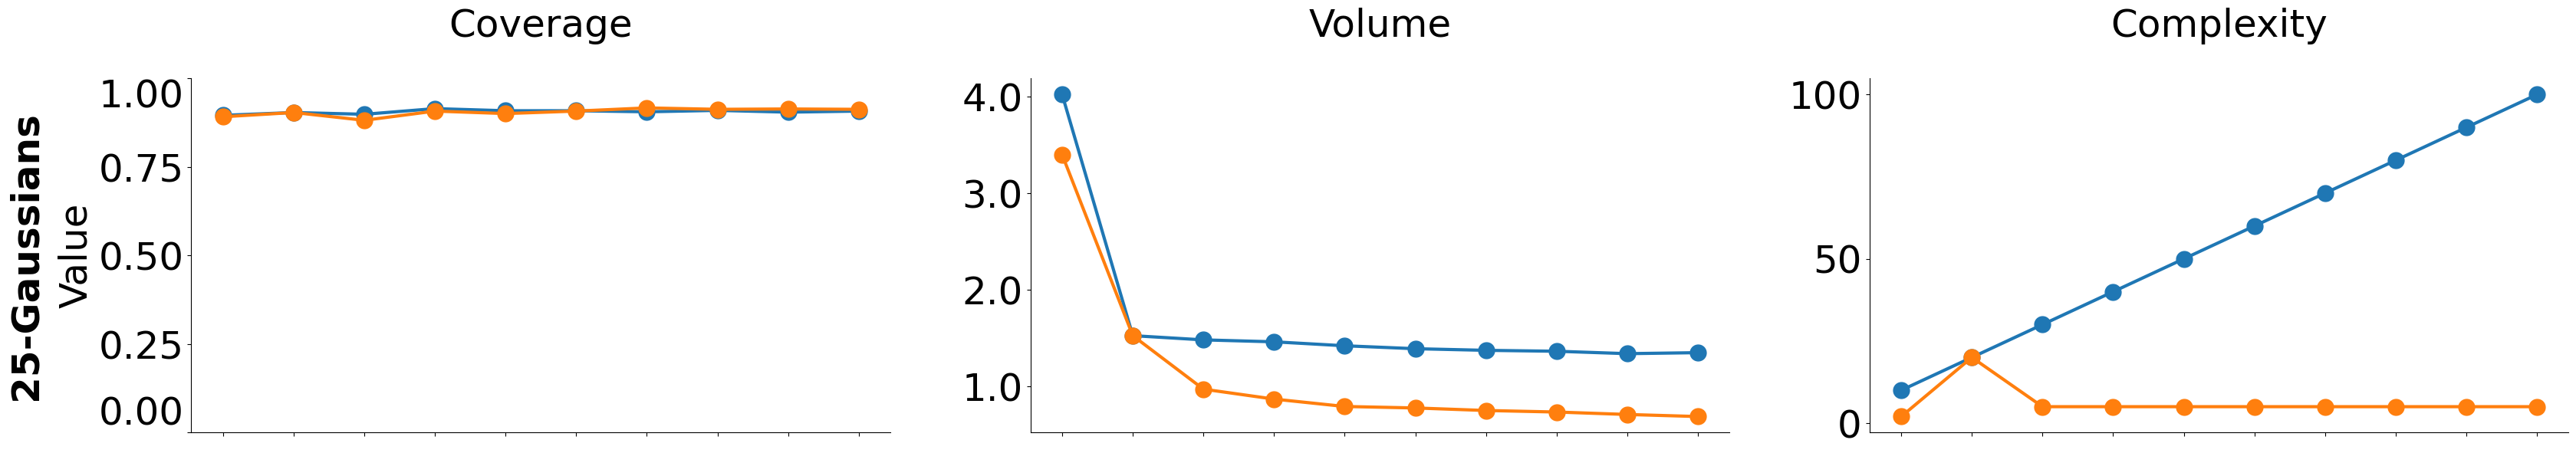

In [42]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(40, 6))  # 1 row, 3 columns

# First subplot
axes[0].plot(data_25_gaussian.ens_sizes, data_25_gaussian.PCP_metrics[:, 0], '-o', label='PCP', linewidth=3, markersize=ms)
axes[0].plot(data_25_gaussian.ens_sizes,  data_25_gaussian.CP_metrics[:, 0], '-o', label='CP4Gen', linewidth=3, markersize=ms)
axes[0].set_ylim(0, 1)
# axes[0].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[0].set_ylabel('Coverage', fontsize=fontsize)
axes[0].set_ylabel('Value', fontsize=fontsize)
axes[0].set_title('Coverage', fontsize=fontsize, y=1.1)
# axes[0].legend(fontsize=fontsize, frameon=False)
axes[0].tick_params(axis='both', labelsize=fontsize)

# Second subplot
axes[1].plot(data_25_gaussian.ens_sizes, data_25_gaussian.PCP_metrics[:, 1], '-o',label='PCP', linewidth=3, markersize=ms)
axes[1].plot(data_25_gaussian.ens_sizes,  data_25_gaussian.CP_metrics[:, 1], '-o', label='CP4Gen', linewidth=3, markersize=ms)
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# axes[1].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[1].set_ylabel('Volume', fontsize=fontsize)
axes[1].set_title('Volume', fontsize=fontsize, y=1.1)
axes[1].tick_params(axis='both', labelsize=fontsize)
#axes[1].legend()

# Third subplot
axes[2].plot(data_25_gaussian.ens_sizes, data_25_gaussian.PCP_metrics[:, 2], '-o', label='PCP', linewidth=3, markersize=ms)
axes[2].plot(data_25_gaussian.ens_sizes,  data_25_gaussian.CP_metrics[:, 2], '-o', label='CP4Gen', linewidth=3, markersize=ms)
# axes[2].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[2].set_ylabel('Complexity', fontsize=fontsize)
axes[2].set_title('Complexity', fontsize=fontsize, y=1.1)
axes[2].tick_params(axis='both', labelsize=fontsize)
#axes[2].legend()

# Add overall title
# fig.suptitle(f'{data_25_gaussian.show_name}', fontsize=fontsize)
axes[0].text(-.21, 0.5, data_25_gaussian.show_name, weight='bold', fontsize=fontsize, horizontalalignment='right', verticalalignment='center', transform=axes[0].transAxes, rotation=90)

for ax in axes:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.set_xticks(data_25_gaussian.ens_sizes)
    ax.set_xticklabels([""]*len(data_25_gaussian.ens_sizes))

axes[0].get_yticklabels()[0].set_verticalalignment('bottom')
axes[0].get_yticklabels()[-1].set_verticalalignment('top')

# Adjust layout (leave space for suptitle)
# plt.tight_layout(rect=[0, 0, 0.98, 1.02])  # top margin is 0.95 instead of 1.0
fig.savefig(f'{data_25_gaussian.show_name}_ens_size_analysis.pdf', bbox_inches='tight')

# Bio

In [23]:
data_bio = Data(1000, 'bio', 'Bio', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

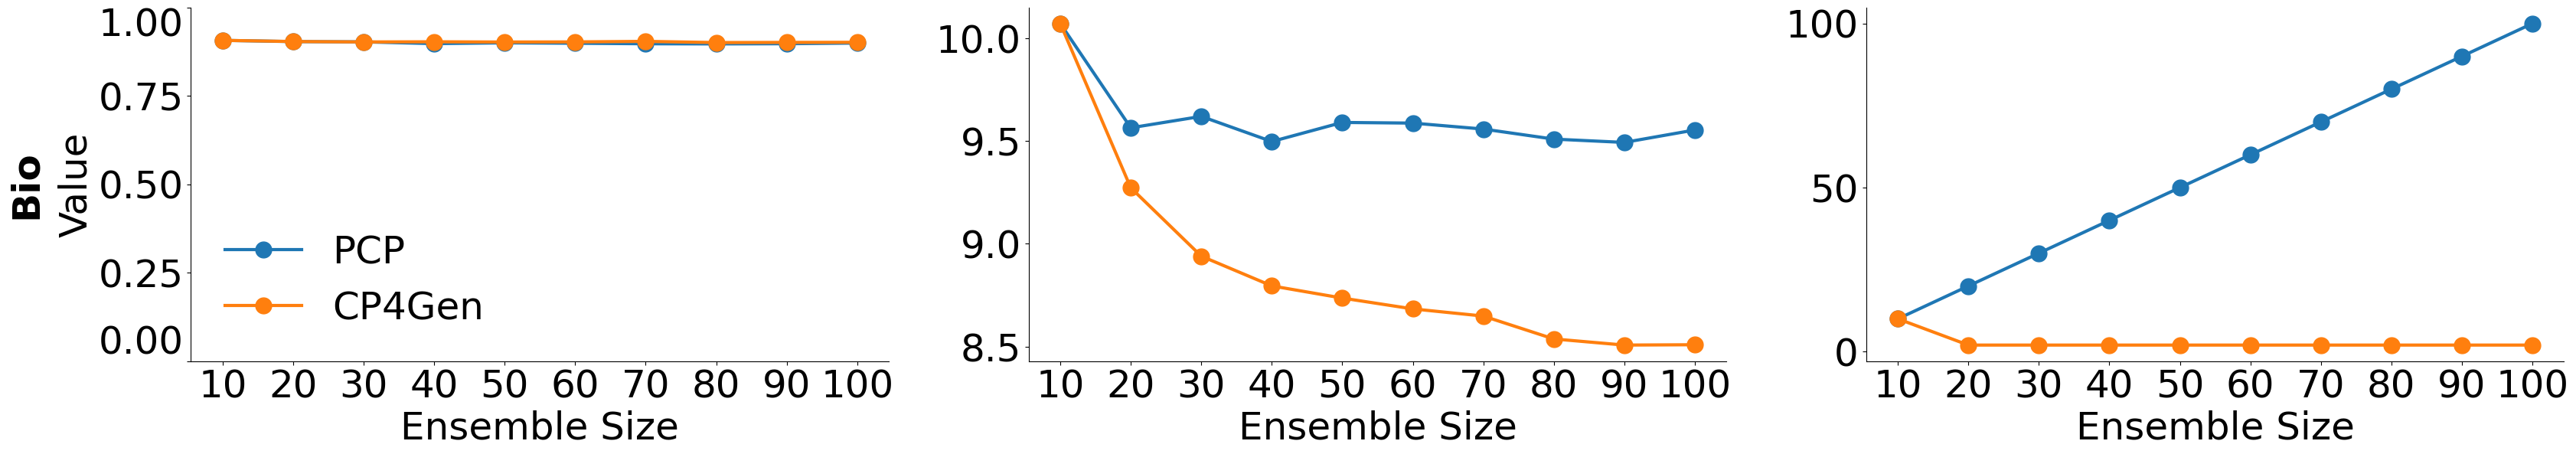

In [43]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(40, 6))  # 1 row, 3 columns

# First subplot
axes[0].plot(data_bio.ens_sizes, data_bio.PCP_metrics[:, 0], '-o', label='PCP', linewidth=3, markersize=ms)
axes[0].plot(data_bio.ens_sizes,  data_bio.CP_metrics[:, 0], '-o', label='CP4Gen', linewidth=3, markersize=ms)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[0].set_ylabel('Coverage', fontsize=fontsize)
axes[0].set_ylabel('Value', fontsize=fontsize)
axes[0].legend(fontsize=fontsize, frameon=False)
axes[0].tick_params(axis='both', labelsize=fontsize)

# Second subplot
axes[1].plot(data_bio.ens_sizes, data_bio.PCP_metrics[:, 1], '-o',label='PCP', linewidth=3, markersize=ms)
axes[1].plot(data_bio.ens_sizes,  data_bio.CP_metrics[:, 1], '-o', label='CP4Gen', linewidth=3, markersize=ms)
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[1].set_ylabel('Volume', fontsize=fontsize)
axes[1].tick_params(axis='both', labelsize=fontsize)
#axes[1].legend()

# Third subplot
axes[2].plot(data_bio.ens_sizes, data_bio.PCP_metrics[:, 2], '-o', label='PCP', linewidth=3, markersize=ms)
axes[2].plot(data_bio.ens_sizes,  data_bio.CP_metrics[:, 2], '-o', label='CP4Gen', linewidth=3, markersize=ms)
axes[2].set_xlabel('Ensemble Size', fontsize=fontsize)
# axes[2].set_ylabel('Complexity', fontsize=fontsize)
axes[2].tick_params(axis='both', labelsize=fontsize)
#axes[2].legend()

# Add overall title
# fig.suptitle(f'{data_bio.show_name}', fontsize=fontsize)
axes[0].text(-.21, 0.5, data_bio.show_name, weight='bold', fontsize=fontsize, horizontalalignment='right', verticalalignment='center', transform=axes[0].transAxes, rotation=90)

for ax in axes:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.set_xticks(data_25_gaussian.ens_sizes)

axes[0].get_yticklabels()[0].set_verticalalignment('bottom')
axes[0].get_yticklabels()[-1].set_verticalalignment('top')

# Adjust layout (leave space for suptitle)
# plt.tight_layout(rect=[0, 0, 0.98, 1.02])  # top margin is 0.95 instead of 1.0
fig.savefig(f'{data_bio.show_name}_ens_size_analysis.pdf', bbox_inches='tight')